# Using and benchmarking tensorflow wrapper on text8 corpus
[TensorFlow](https://www.tensorflow.org) is Google Brain's second generation machine learning system, 
with a reference implementation released as open source software on November 9, 2015. This tutorial will compare the time taken to train on gensim's word2vec implementation with TensorFlow's.
Before getting started you need to install [gensim](https://github.com/RaRe-Technologies/gensim/) and [setup Tensorflow](https://www.tensorflow.org/get_started/os_setup) to run with GPU support.
This wrapper has all the functionalities of the conventional word2vec of gensim.

# Training the model
We will be training the model using [lee corpus.](https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/test/test_data/lee_background.cor)

In [1]:
%matplotlib inline 
import gensim
import os, time

from gensim.models.tfword2vec import TfWord2Vec
from gensim.models.word2vec import Word2Vec, Text8Corpus

import matplotlib.pyplot as plt


Initialising the model trains it as well.


In [2]:
corpus = '../../gensim/test/test_data/lee.cor'
save_path = '.'
model = TfWord2Vec(corpus, epochs_to_train=1, embedding_size=100, batch_size=100000, save_path=save_path)
model.train()

Data file:  ../../gensim/test/test_data/lee.cor
Vocab size:  96  + UNK
Words per epoch:  3983
Data file:  ../../gensim/test/test_data/lee.cor=    83407
Vocab size:  96  + UNK
Words per epoch:  3983


In [3]:
model = Word2Vec(corpus, iter=1)

This model behaves similar to the wor2vec model.

In [4]:
print(model)#,modelg)
# print(model.wv.vocab)
#model.most_similar('President')
#model.similarity('President', 'military')

Word2Vec(vocab=4, size=100, alpha=0.025)


## Saving and loading the model

In [5]:
from tempfile import mkstemp

fs, temp_path = mkstemp("tfword2vec_temp")  # creates a temp file

#model.save(temp_path)  # save the model

# Gensim benchmark
These benchmarks are conducted on Intel i7 6700K with hyper threading over-clocked to 4.4GHz. 

In [ ]:
batch_size = []
time_taken = []
size = 100000000
while size<=10000000:
    start = time.time()
    corpus = Text8Corpus("text8")
    model = Word2Vec(corpus, iter=1, hs=1, negative=0, batch_words=size)
    print "Gensim:\n" + str(time.time()-start)
    size *= 10

# Benchmarking TensorFlow
Using the TensorFlow wrapper for gensim to train the model.

We are considering only one epoch i.e the number of training examples processed per step.
For varying batch sizes i.e the number of training examples each step processes we encounter different results.

In [9]:
batch_size = []
time_taken = []
size = 100#00000
while size<=10000000:
    start = time.time()
    model = TfWord2Vec("text8", epochs_to_train=1, embedding_size=100, batch_size=size, num_neg_samples=0)
    batch_size.append(size)
    time_taken.append(time.time()-start)
    print("\nTensorflow:" + str(time_taken[-1]))
    print("Batch size:" + str(size) + "\n")
    size *= 10

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step   754730: lr = 0.006 words/sec =    39239
Tensorflow:84.2913510799
Batch size:100

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step    75472: lr = 0.006 words/sec =   958657
Tensorflow:14.2873580456
Batch size:1000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step     7548: lr = 0.006 words/sec =  2524956
Tensorflow:9.20834207535
Batch size:10000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step      753: lr = 0.006 words/sec =  2555518
Tensorflow:9.12145018578
Batch size:100000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    1 Step       73: lr = 0.003 words/sec =  2853582
Tensorflow:9.29603505135
Batch size:1000000

Data file:  text8
Vocab size:  71290  + UNK
Words per epoch:  17005207
Epoch    3 Step       14: lr = 0.000 words/sec =  8762526
Tensorflow:

[287.65921902656555, 70.377512216568, 60.35301494598389, 60.31839084625244, 55.83613204956055, 102.36370205879211]
[100, 1000, 10000, 100000, 1000000, 10000000]


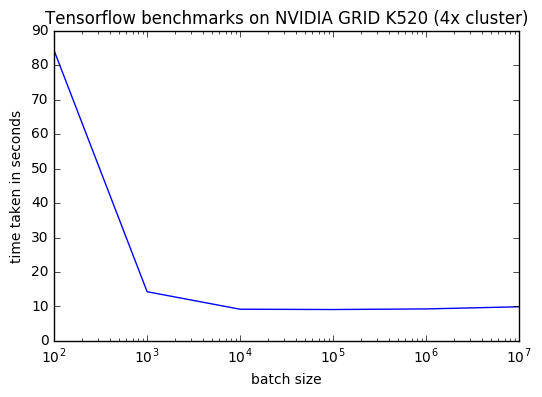

In [10]:
b = [100, 1000, 10000, 100000, 1000000, 10000000]
t =[287.65921902656555, 70.377512216568, 60.35301494598389, 60.31839084625244, 55.83613204956055, 102.36370205879211]

plt.xscale('log', nonposy='clip')
plt.plot(batch_size, time_taken)
plt.title('Tensorflow benchmarks on NVIDIA GRID K520 (4x cluster)')
plt.ylabel('time taken in seconds')
plt.xlabel('batch size')
print(t)
print(b)

Note how the time taken decreases drastically with increasing batch size.